https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/inference/model_inversion.html
https://dl.acm.org/doi/pdf/10.1145/2810103.2813677

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from art.attacks.inference.model_inversion import MIFace
from art.utils import load_dataset
from art.estimators.classification import KerasClassifier #No soporta TF 2

# Disabling eager execution from TF 2
tf.compat.v1.disable_eager_execution()

/Users/jyass/miniforge3/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
/Users/jyass/miniforge3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
vulnerable_model = tf.keras.models.load_model("modelo_victima1")

Metal device set to: Apple M1


2024-04-22 21:42:41.696888: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-22 21:42:41.696998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-04-22 21:42:41.704232: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-22 21:42:41.704762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-22 21:42:41.718151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [3]:
#Se utilizara una version del dataset del MNIST con 60k digitos a mano que incluye ART
(train_images, train_labels), (test_images, test_labels), min, max = load_dataset(name="mnist")

In [4]:
clasificador = KerasClassifier(
    model=vulnerable_model,
    clip_values=(min, max))

In [5]:
# Defining a model inversion attack
attack = MIFace(
    classifier=clasificador,
    max_iter=500, #Este parametro depende del hardware, es el numero de repeticiones para el gradiente descendente
    batch_size=256)

In [6]:
# Defining the target labels for model inversion
y = np.arange(start=0, stop=10)

# Inspecting the target labels
print(y)

[0 1 2 3 4 5 6 7 8 9]


In [7]:
# Defining an initialization array for model inversion
#La calidad del output depende tambien de este vector de inicializaion
x_init_average = np.zeros(shape=(10, 28, 28, 1)) + np.mean(a=test_images, axis=0)

In [8]:
# Running model inversion
x_infer_from_average = attack.infer(
    x=x_init_average, 
    y=y
    )

Model inversion:   0%|                                    | 0/1 [00:00<?, ?it/s]2024-04-22 21:45:26.481473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-22 21:45:26.630859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-22 21:45:26.695819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-22 21:45:26.756139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-22 21:45:26.823127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-04-22 21:45:26.887467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is

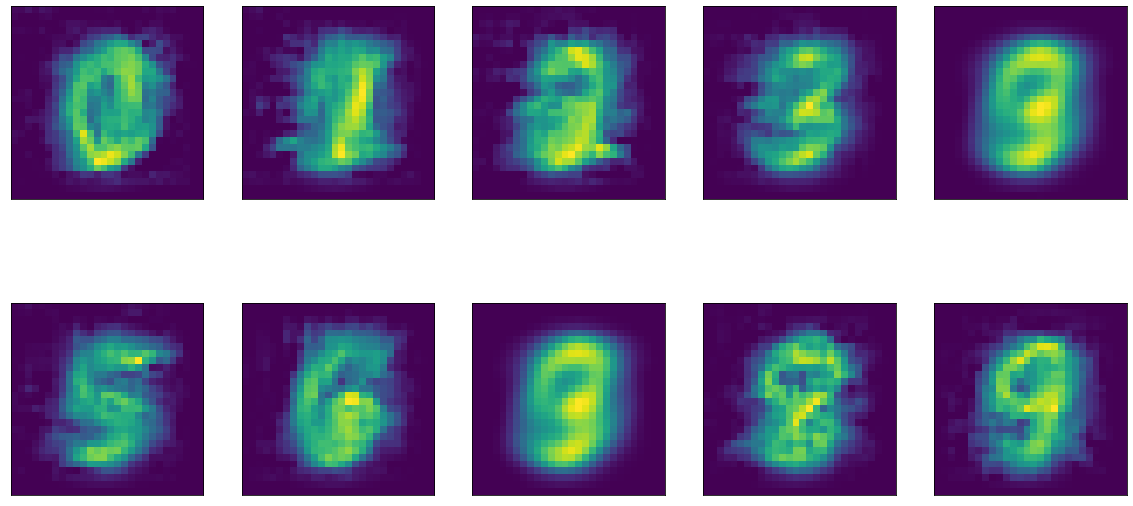

In [9]:
nrows, ncols = 2, 5
# Creating a figure and axes for our plot
fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

# Declaring a counting variable
counter = 0

# Iterating over the axes and plotting the inferred images in them
for i in range(nrows):
    for j in range(ncols):        
        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])
        axes[i, j].imshow(X=x_infer_from_average[counter])

        # Incrementing the counter
        counter += 1

# Showing the plotted axes
plt.show()